In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/laptop_pricing.csv")

# Overview dos dados
df.head()

#Retirar os NA
df = df.dropna()

In [ ]:
#1.1
# Screen-size
# Medidas de Localização
media = df["Screen_Size_cm"].mean()
mediana = df["Screen_Size_cm"].median()
moda = df["Screen_Size_cm"].mode()[0]  # Pegando a moda (se houver mais de uma, pega a primeira)

# Medidas de Localização Relativa
maximo = df["Screen_Size_cm"].max()
minimo = df["Screen_Size_cm"].min()
quartis = df["Screen_Size_cm"].quantile([0.25, 0.5, 0.75])

# Medidas de Dispersão
variancia = df["Screen_Size_cm"].var()
desvio_padrao = df["Screen_Size_cm"].std()
amplitude = maximo - minimo
iqr = quartis[0.75] - quartis[0.25]  # Intervalo interquartil (IQR)

# Medidas de Forma
coeficiente_assimetria = df["Screen_Size_cm"].skew()

# Criar um DataFrame com os resultados
analise_screen_size = pd.DataFrame({
    "Métrica": ["Média", "Mediana", "Moda", "Máximo", "Mínimo", "Q1 (25%)", "Q2 (50%)", "Q3 (75%)",
                "Variância", "Desvio Padrão", "Amplitude", "IQR", "Coeficiente de Assimetria"],
    "Valor": [media, mediana, moda, maximo, minimo, quartis[0.25], quartis[0.5], quartis[0.75],
              variancia, desvio_padrao, amplitude, iqr, coeficiente_assimetria]
})

# Exibir os resultados
print(analise_screen_size)

                      Métrica      Valor
0                       Média  37.290306
1                     Mediana  38.100000
2                        Moda  39.624000
3                      Máximo  43.942000
4                      Mínimo  30.480000
5                    Q1 (25%)  35.560000
6                    Q2 (50%)  38.100000
7                    Q3 (75%)  39.624000
8                   Variância   8.828201
9               Desvio Padrão   2.971229
10                  Amplitude  13.462000
11                        IQR   4.064000
12  Coeficiente de Assimetria  -0.036218


In [ ]:
#1.2
#Price
# Medidas de Localização
media_price = df["Price"].mean()
mediana_price = df["Price"].median()
moda_price = df["Price"].mode()[0]  # Pegando a moda (se houver mais de uma, pega a primeira)

# Medidas de Localização Relativa
maximo_price = df["Price"].max()
minimo_price = df["Price"].min()
quartis_price = df["Price"].quantile([0.25, 0.5, 0.75])

# Medidas de Dispersão
variancia_price = df["Price"].var()
desvio_padrao_price = df["Price"].std()
amplitude_price = maximo_price - minimo_price
iqr_price = quartis_price[0.75] - quartis_price[0.25]  # Intervalo interquartil (IQR)

# Medidas de Forma
coeficiente_assimetria_price = df["Price"].skew()

# Criar um DataFrame com os resultados
analise_price = pd.DataFrame({
    "Métrica": ["Média", "Mediana", "Moda", "Máximo", "Mínimo", "Q1 (25%)", "Q2 (50%)", "Q3 (75%)",
                "Variância", "Desvio Padrão", "Amplitude", "IQR", "Coeficiente de Assimetria"],
    "Valor": [media_price, mediana_price, moda_price, maximo_price, minimo_price, quartis_price[0.25], quartis_price[0.5], quartis_price[0.75],
              variancia_price, desvio_padrao_price, amplitude_price, iqr_price, coeficiente_assimetria_price]
})

# Exibir os resultados
print(analise_price)

                      Métrica          Valor
0                       Média    1458.423581
1                     Mediana    1333.000000
2                        Moda    1117.000000
3                      Máximo    3810.000000
4                      Mínimo     527.000000
5                    Q1 (25%)    1068.000000
6                    Q2 (50%)    1333.000000
7                    Q3 (75%)    1763.000000
8                   Variância  329743.139968
9               Desvio Padrão     574.232653
10                  Amplitude    3283.000000
11                        IQR     695.000000
12  Coeficiente de Assimetria       1.328465


In [ ]:
#1.3
#Manufacturer

# Contagem absoluta de cada fabricante
freq_absoluta = df["Manufacturer"].value_counts()

# Contagem relativa (percentual)
freq_relativa = df["Manufacturer"].value_counts(normalize=True) * 100

# Exibir os resultados
print("Frequência Absoluta:\n", freq_absoluta)
print("\nFrequência Relativa (%):\n", freq_relativa)

Frequência Absoluta:
 Manufacturer
Dell       65
Lenovo     52
HP         47
Acer       19
Asus       18
Toshiba    17
MSI         4
Samsung     4
Huawei      1
Razer       1
Xiaomi      1
Name: count, dtype: int64

Frequência Relativa (%):
 Manufacturer
Dell       28.384279
Lenovo     22.707424
HP         20.524017
Acer        8.296943
Asus        7.860262
Toshiba     7.423581
MSI         1.746725
Samsung     1.746725
Huawei      0.436681
Razer       0.436681
Xiaomi      0.436681
Name: proportion, dtype: float64


In [ ]:
#2.1 Relação entre a Price e as variaveis Screen Size e Manufacturer

#Regressão Linear
correlacao_screen_size = df["Price"].corr(df["Screen_Size_cm"])
print(f"Correlação entre Screen_Size_cm e Price: {correlacao_screen_size:.2f}")

# Regressão Linear: Price vs. Screen_Size_cm
X_screen = df["Screen_Size_cm"]
y_price = df["Price"]
X_screen = sm.add_constant(X_screen)  # Adicionar constante

model_screen = sm.OLS(y_price, X_screen).fit()
print(model_screen.summary())

#Como r=−0.13 → Correlação fraca e negativa.
# Isso sugere que há pouca relação entre o tamanho da tela e o preço.

Correlação entre Screen_Size_cm e Price: -0.13
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     4.005
Date:                Tue, 18 Mar 2025   Prob (F-statistic):             0.0466
Time:                        22:41:18   Log-Likelihood:                -1777.3
No. Observations:                 229   AIC:                             3559.
Df Residuals:                     227   BIC:                             3565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

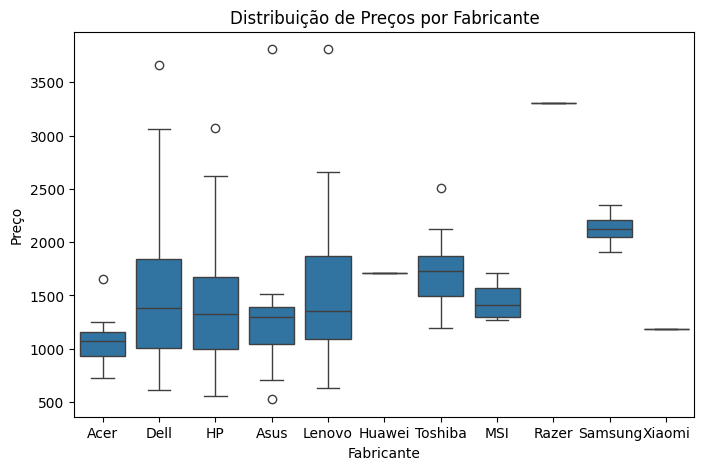

              count         mean         std     min      25%     50%  \
Manufacturer                                                            
Acer           19.0  1067.157895  209.723432   727.0   935.00  1075.0   
Asus           18.0  1327.111111  680.974638   527.0  1048.75  1301.0   
Dell           65.0  1474.584615  606.047644   616.0  1010.00  1383.0   
HP             47.0  1422.127660  535.759989   558.0   994.00  1327.0   
Huawei          1.0  1714.000000         NaN  1714.0  1714.00  1714.0   
Lenovo         52.0  1493.096154  595.108171   634.0  1090.50  1352.0   
MSI             4.0  1452.750000  207.247638  1268.0  1296.50  1414.5   
Razer           1.0  3301.000000         NaN  3301.0  3301.00  3301.0   
Samsung         4.0  2126.500000  183.482061  1904.0  2047.25  2126.5   
Toshiba        17.0  1703.882353  335.448558  1198.0  1499.00  1731.0   
Xiaomi          1.0  1188.000000         NaN  1188.0  1188.00  1188.0   

                  75%     max  
Manufacturer      

In [ ]:
#2.2
preco_por_fabricante = df.groupby("Manufacturer")["Price"].describe()

#  boxplot para visualizar a distribuição do preço por fabricante
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Manufacturer"], y=df["Price"])
plt.xlabel("Fabricante")
plt.ylabel("Preço")
plt.title("Distribuição de Preços por Fabricante")
plt.show()

# Exibir as estatísticas descritivas do preço por fabricante
print(preco_por_fabricante)

#As marcas DELL, HP, ASUS, LENOVO, tem a media de preços muito semelhante, com a hUAWEI, TOSHIVA E SAMSUNG a destacarem se no preço medio. A Dell e a Lenovo apresentam uma maior distribuição de preços, conseguindo atingir diferentes ranges de clientes.


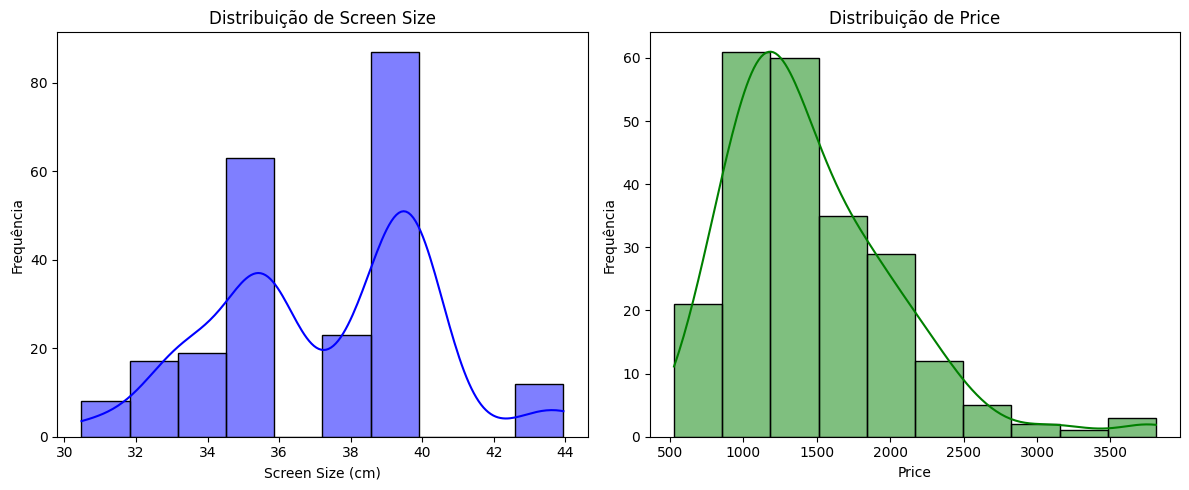

In [ ]:
#3.1 Representação gráfice de cada variável

# histogramas para Screen_Size_cm e Price
plt.figure(figsize=(12, 5))

#  Histograma para Screen_Size_cm
plt.subplot(1, 2, 1)
sns.histplot(df["Screen_Size_cm"], bins=10, kde=True, color="blue")
plt.xlabel("Screen Size (cm)")
plt.ylabel("Frequência")
plt.title("Distribuição de Screen Size")

#  Histograma para Price
plt.subplot(1, 2, 2)
sns.histplot(df["Price"], bins=10, kde=True, color="green")
plt.xlabel("Price")
plt.ylabel("Frequência")
plt.title("Distribuição de Price")

# Mostrar gráficos
plt.tight_layout()
plt.show()

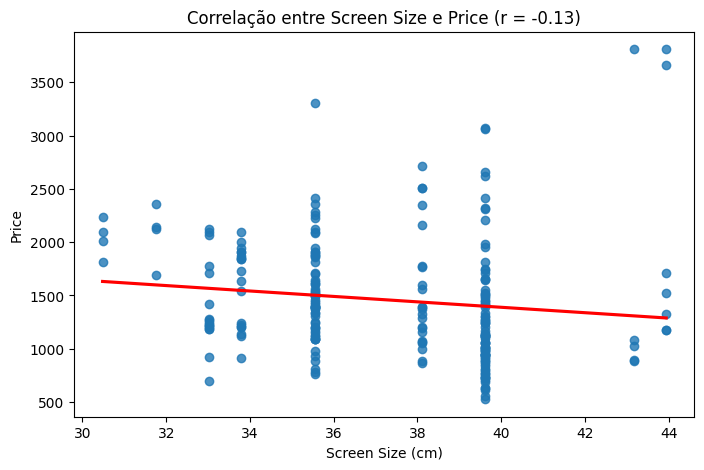

In [ ]:
#3.2 Relação entre Screen Size e Price

plt.figure(figsize=(8,5))
sns.regplot(x=df["Screen_Size_cm"], y=df["Price"], ci=None, line_kws={"color":"red"})
plt.xlabel("Screen Size (cm)")
plt.ylabel("Price")
plt.title(f"Correlação entre Screen Size e Price (r = {correlacao_screen_size:.2f})")
plt.show()
